In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.


In [9]:
#new features to be created
# Time-Based Features:

# Create seasonal indicators from flight_day (is_weekend, is_holiday_season)
# Time of day categories from flight_hour (morning/afternoon/evening/night)
# Booking seasonality from purchase_lead (holiday periods, peak travel seasons)
# Create time windows for purchase_lead (last_minute: <7 days, early_bird: >60 days)

def isWeekend(day):
    if day in [6, 7]:
        return 'yes'
    else:
        return 'no'
def timeOfDay(hour):
    if hour in range(6, 12):
        return "morning"
    elif hour in range(12, 18):
        return "afternoon"
    elif hour in range(18, 24):
        return "evening"
    else:
        return "night"
def bookingSeasonality(lead):
    if lead < 7:
        return "last_minute"
    elif lead > 60:
        return "early_bird"
    else:
        return "regular"


# Passenger Behavior:

# Total add-ons requested (sum of wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals)
# Spending propensity score based on add-on selections
# Per-person cost indicators (total_add_ons / num_passengers)
# Group type based on num_passengers (solo, couple, family, large_group)
def addOns(row):
    return row["wants_extra_baggage"] + row["wants_preferred_seat"] + row["wants_in_flight_meals"]
def per_person_cost(row):
    return row["total_add_ons"] / row["num_passengers"]
def groupType(num):
    if num == 1:
        return "solo"
    elif num == 2:
        return "couple"
    elif num <= 4:
        return "family"
    else:
        return "large_group"
# Route Analysis:

# Route popularity (frequency of each route)
# Distance categories (short-haul, medium-haul, long-haul) from flight_duration
# Domestic vs International flags from route
# Popular destination indicators
# Cross-border booking flag (booking_origin different from route origin)

def popularRoute(route):
    return df["route"].value_counts()[route]
def distanceCategory(duration):
    if duration < 3:
        return "short-haul"
    elif duration < 6:
        return "medium-haul"
    else:
        return "long-haul"
# def domesticOrInternational(row):
#     if row["route_origin"] == row["booking_origin"]:
#         return "domestic"
#     else:
#         return "international"
# def popularDestination(destination):
#     return df["booking_destination"].value_counts()[destination]
# def crossBorder(row):
#     if row["route_origin"] != row["booking_origin"]:
#         return 1
#     else:
#         return 0

In [10]:
df["is_weekend"] = df["flight_day"].apply(isWeekend)
df["time_of_day"] = df["flight_hour"].apply(timeOfDay)
df["booking_season"] = df["purchase_lead"].apply(bookingSeasonality)
df["total_add_ons"] = df.apply(addOns, axis=1)
df["spending_score"] = df["total_add_ons"] / 3
df["per_person_cost"] = df.apply(per_person_cost, axis=1)
df["group_type"] = df["num_passengers"].apply(groupType)
df["route_popularity"] = df["route"].apply(popularRoute)
df["distance_category"] = df["flight_duration"].apply(distanceCategory)
#df["domestic_or_international"] = df.apply(domesticOrInternational, axis=1)
#df["popular_destination"] = df["booking_destination"].apply(popularDestination)
#df["cross_border"] = df.apply(crossBorder, axis=1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  is_weekend             50000 non-null  object 
 15  ti

* Random forest is chosen for its ability to handle various data types, provide feature importance, mitigate overfitting and can capture non-linear relationships.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler


In [13]:
def prepare_data(df):
    df_model = df.copy()
    
    # Identify categorical columns
    categorical_columns = ['sales_channel', 'trip_type', 'route', 'booking_origin', 
                         'is_weekend', 'time_of_day', 'booking_season', 
                         'group_type', 'distance_category']
    
    label_encoders = {}
    
    # Encode categorical variables
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        df_model[column] = label_encoders[column].fit_transform(df_model[column])
    
    numeric_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 
                      'flight_hour', 'flight_day', 'wants_extra_baggage',
                      'wants_preferred_seat', 'wants_in_flight_meals', 
                      'flight_duration', 'total_add_ons', 'spending_score',
                      'per_person_cost', 'route_popularity']
    
    for column in numeric_columns:
        df_model[column] = df_model[column].astype(float)
    
    return df_model, label_encoders


* A clear imbalance (8504 vs. 1496 samples) was skewing the model to prioritize the majority class (0). So we used SMOTE + SMOTEENN : Results in better recall for the minority class, which is crucial for identifying holiday buyers to tackle class imbalance. 
* We have used StratifiedKFold to ensure that the class distribution is maintained across folds.
* And then adjust the threshold for predicting class 1 (minority class) based on the ROC curve to improve recall and the overall balance of metrics.

In [14]:
def train_and_evaluate_model(df):
    # Prepare data
    df_model, label_encoders = prepare_data(df)
    X = df_model.drop('booking_complete', axis=1)
    y = df_model['booking_complete']  # Target 
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Handle class imbalance with SMOTE
    smote_enn = SMOTEENN(random_state=42)
    X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
    
    
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1  # Use all available cores
    )
    rf_model.fit(X_train_resampled, y_train_resampled)
    
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # optimal threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(f"\nOptimal threshold: {optimal_threshold:.2f}")
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)
    
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nModel Performance Metrics:")
    print("-" * 50)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    
    # Stratified Cross-Validation
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_model, X, y, cv=stratified_cv, scoring='roc_auc')
    print(f"\nCross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title('Top 15 Most Important Features for Booking Prediction')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return rf_model, feature_importance, label_encoders

In [15]:
def predict_booking(model, encoders, new_data):
    data = new_data.copy()
    
    day_mapping = {
        'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 
        'Fri': 4, 'Sat': 5, 'Sun': 6
    }
    
    if isinstance(data['flight_day'], str):
        data['flight_day'] = day_mapping.get(data['flight_day'], 0)
    
    numeric_fields = [
        'num_passengers', 'purchase_lead', 'length_of_stay', 
        'flight_hour', 'flight_day', 'wants_extra_baggage',
        'wants_preferred_seat', 'wants_in_flight_meals', 
        'flight_duration', 'total_add_ons', 'spending_score',
        'per_person_cost', 'route_popularity'
    ]
    
    for field in numeric_fields:
        if field in data:
            data[field] = float(data[field])
    
    categorical_columns = [
        'sales_channel', 'trip_type', 'route', 'booking_origin', 
        'is_weekend', 'time_of_day', 'booking_season', 
        'group_type', 'distance_category'
    ]
    
    for column in categorical_columns:
        if column in data:
            try:
                data[column] = encoders[column].transform([str(data[column])])[0]
            except ValueError as e:
                print(f"Warning: Unknown category '{data[column]}' in column '{column}'")
                # Use the most frequent category as fallback
                data[column] = encoders[column].transform([encoders[column].classes_[0]])[0]
    
    feature_order = model.feature_names_in_
    input_data = [data[feature] for feature in feature_order]
    
    prediction = model.predict([input_data])[0]
    probability = model.predict_proba([input_data])[0]
    
    return {
        'prediction': 'Booking Complete' if prediction == 1 else 'Booking Incomplete',
        'confidence': float(probability.max()),
        'booking_probability': float(probability[1])
    }

def show_valid_categories(encoders):
    print("\nValid categories for each field:")
    for column, encoder in encoders.items():
        print(f"\n{column}:")
        print(sorted(list(encoder.classes_)))


Optimal threshold: 0.29

Model Performance Metrics:
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.78      8504
           1       0.29      0.74      0.41      1496

    accuracy                           0.69     10000
   macro avg       0.61      0.71      0.60     10000
weighted avg       0.84      0.69      0.73     10000


ROC AUC Score: 0.7700880617362825

Cross-validation ROC AUC: 0.7673 (+/- 0.0052)


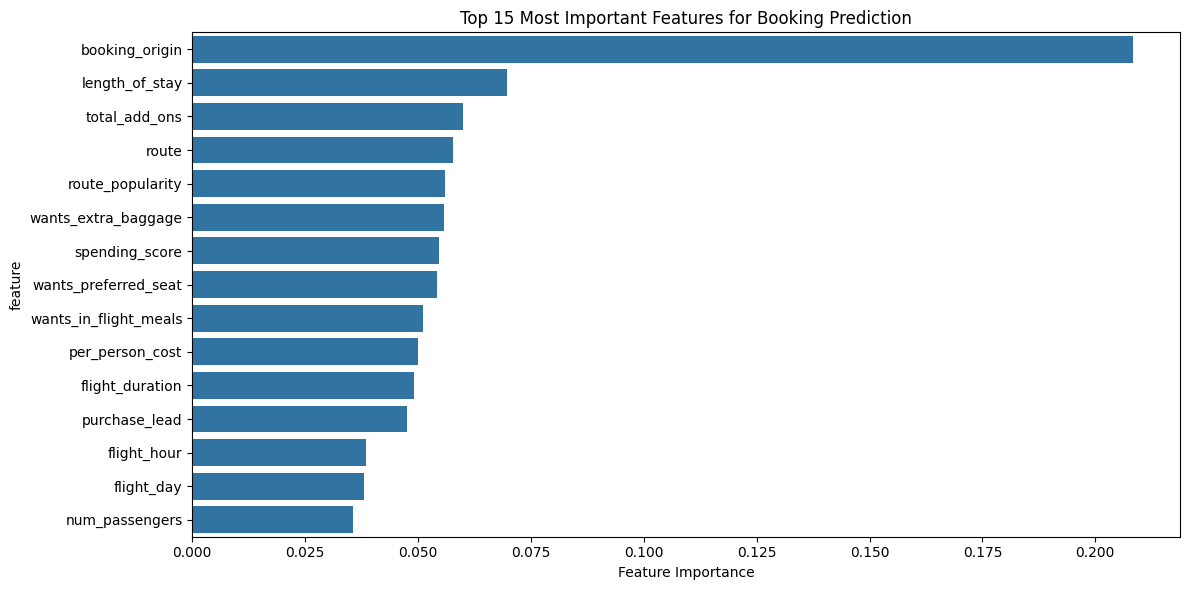

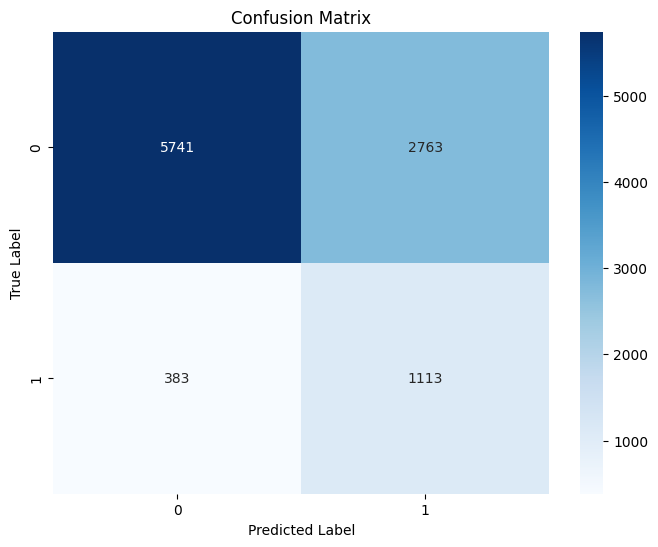


Top 10 Most Important Features:
                  feature  importance
8          booking_origin    0.208346
4          length_of_stay    0.069730
16          total_add_ons    0.059877
7                   route    0.057710
20       route_popularity    0.055875
9     wants_extra_baggage    0.055822
17         spending_score    0.054546
10   wants_preferred_seat    0.054285
11  wants_in_flight_meals    0.051131
18        per_person_cost    0.049926


In [16]:
model, importance, encoders = train_and_evaluate_model(df)

print("\nTop 10 Most Important Features:")
print(importance.head(10))

In [28]:
# making a prediction with explanation
new_booking = {
'num_passengers': 2,
'sales_channel': 'Mobile',
'trip_type': 'OneWay',
'route': 'BOMSYD',
'booking_origin': 'Australia',
'purchase_lead': 35,
'length_of_stay': 15,
'flight_hour': 12,
'flight_day': 'Wed',
'wants_extra_baggage': 1,
'wants_preferred_seat': 0,
'wants_in_flight_meals': 1,
'flight_duration': 12,
'total_add_ons': 2,
'spending_score': 0.67,
'per_person_cost': 20.0,
'group_type': 'couple',
'route_popularity': 100,
'is_weekend': 'no',
'time_of_day': 'afternoon',
'booking_season': 'regular',
'distance_category': 'medium-haul'
}
prediction = predict_booking(model, encoders, new_booking)
print("\nSample Prediction:")
print(f"Prediction: {prediction['prediction']}")
print(f"Confidence: {prediction['confidence']:.4f}")
print(f"Booking Probability: {prediction['booking_probability']:.4f}")


Sample Prediction:
Prediction: Booking Incomplete
Confidence: 0.5000
Booking Probability: 0.5000


/Users/anantraj/anaconda3/envs/dissertation/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/anantraj/anaconda3/envs/dissertation/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
